In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:

data = load_breast_cancer()
x, y = data.data[:, :2], data.target


In [52]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [55]:
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=150, random_state=42)

In [56]:

y_pred = gbc.predict(x_test)


In [57]:

print("accuracy:", accuracy_score(y_test, y_pred))
print("\nclassification report:\n", classification_report(y_test, y_pred))


accuracy: 0.9122807017543859

classification report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.96      0.90      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [58]:

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
z = gbc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


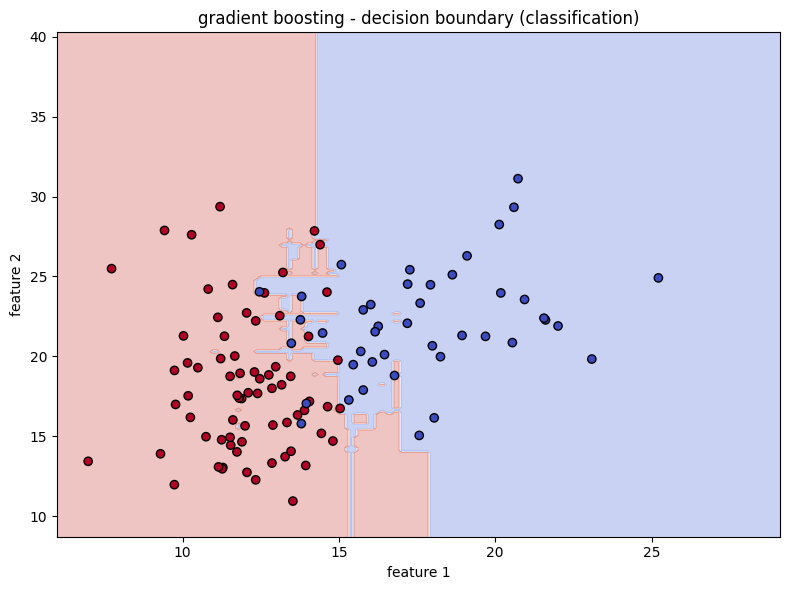

In [59]:

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, alpha=0.3, cmap='coolwarm')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("gradient boosting - decision boundary (classification)")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.tight_layout()
plt.show()


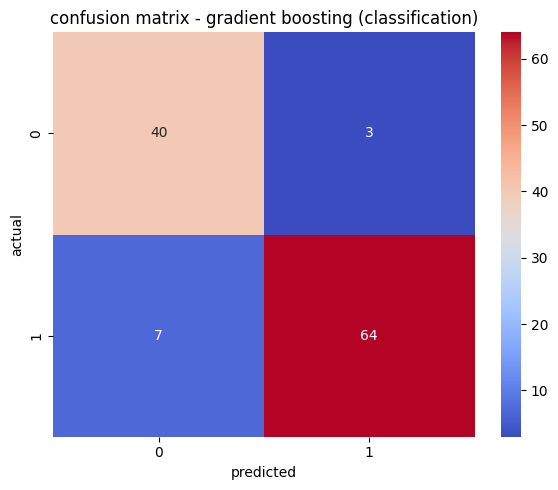

In [60]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("confusion matrix - gradient boosting (classification)")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.tight_layout()
plt.show()